# Group Project: Arxiv Classifier
Authors: Amir Yunus, Brandon Gay, Lee Oon Teng

In [1]:
from utils import load_data, split_data, save_model
from utils.architecture.convolutional_neural_network import ConvolutionalNeuralNetwork


# 08 - $M_4$: Convolutional Neural Network


## 08.1 - Load the Data

In [2]:
filename = 'arxiv'
df = load_data(f'../data/03_{filename}_engineered.bin')
df.shape

,title_emb_0,title_emb_1,title_emb_2,title_emb_3,title_emb_4,title_emb_5,title_emb_6,title_emb_7,title_emb_8,title_emb_9,...,title_sentiment,summary_sentiment,comment_sentiment,authors_sentiment,title_ari,summary_ari,comment_ari,authors_ari,category,split
0,-0.316280,0.338162,0.180578,-0.086113,-0.247716,0.640725,0.333832,0.832219,-0.262952,0.072209,...,0.600000,0.451058,0.50,0.5,1.0,1.0,1.0,1.0,physics,train
1,-0.271645,0.228114,0.203795,-0.257775,-0.083051,0.499957,0.471172,0.737172,-0.135142,0.213080,...,0.530556,0.406599,0.50,0.5,1.0,1.0,1.0,1.0,physics,train
2,-0.380401,0.264061,0.162928,-0.187630,-0.171296,0.660988,0.372280,0.938673,-0.259530,-0.110329,...,0.608333,0.529045,0.70,0.5,1.0,1.0,1.0,1.0,physics,train
3,-0.496275,0.129620,0.048845,0.000629,-0.320589,0.458095,0.439276,0.694186,-0.358091,-0.272360,...,0.312500,0.441523,0.65,0.5,1.0,1.0,1.0,1.0,mathematics,train
4,-0.163396,0.336321,0.343406,-0.162484,-0.134234,0.729687,0.424456,0.891292,-0.304655,0.020353,...,0.490000,0.472394,0.50,0.5,1.0,1.0,1.0,1.0,physics,train


(58816, 3158)

## 08.2 - Split the Data

In [3]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df)

Train set: 37142 samples
Validation set: 15795 samples
Test set: 5879 samples


## 08.3 - Create the Model Object

In [4]:
m4_model = ConvolutionalNeuralNetwork(input_dim=X_train.shape[1])

Using 8 GPUs!
Using device: cuda


## 08.4 - Train the Model

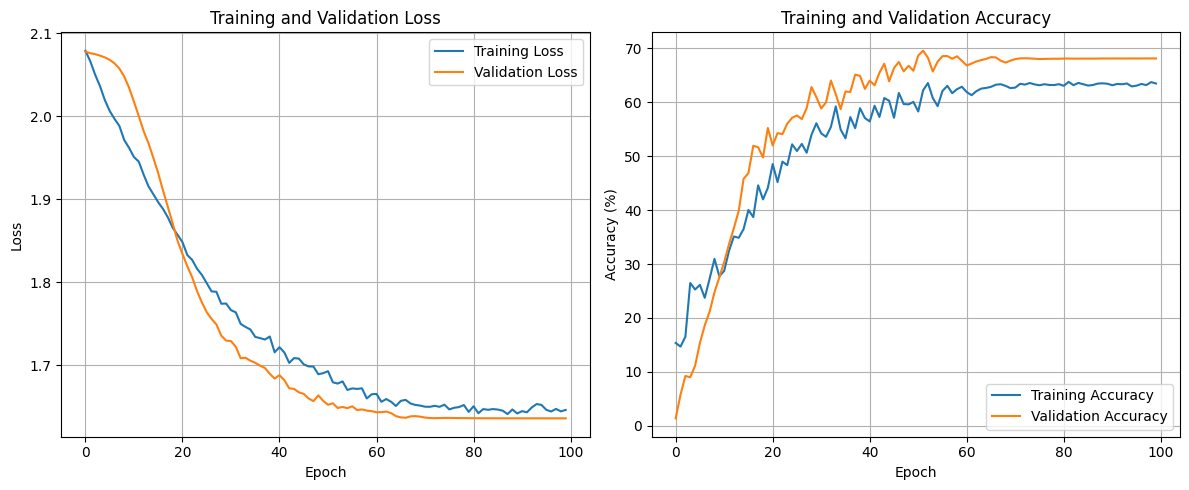

Training: 100%|██████████| 100/100 [04:31<00:00,  2.72s/it, train_loss=1.6464, val_loss=1.6363, train_acc=63.46%, val_acc=68.11%]


In [5]:
train_loss, val_loss = m4_model.fit(X_train, y_train, X_val, y_val, batch_size = 20_000)

## 08.5 - Evaluate the Model


Classification Report:
                                            precision    recall  f1-score   support

                          computer science       0.81      0.43      0.56      1258
                                 economics       0.06      0.40      0.10        25
electrical engineering and systems science       0.18      0.77      0.29       142
                               mathematics       0.76      0.81      0.78      1353
                                   physics       0.94      0.72      0.82      2679
                      quantitative biology       0.32      0.73      0.45       201
                      quantitative finance       0.34      0.70      0.45        90
                                statistics       0.22      0.51      0.30       131

                                  accuracy                           0.67      5879
                                 macro avg       0.45      0.63      0.47      5879
                              weighted avg       0

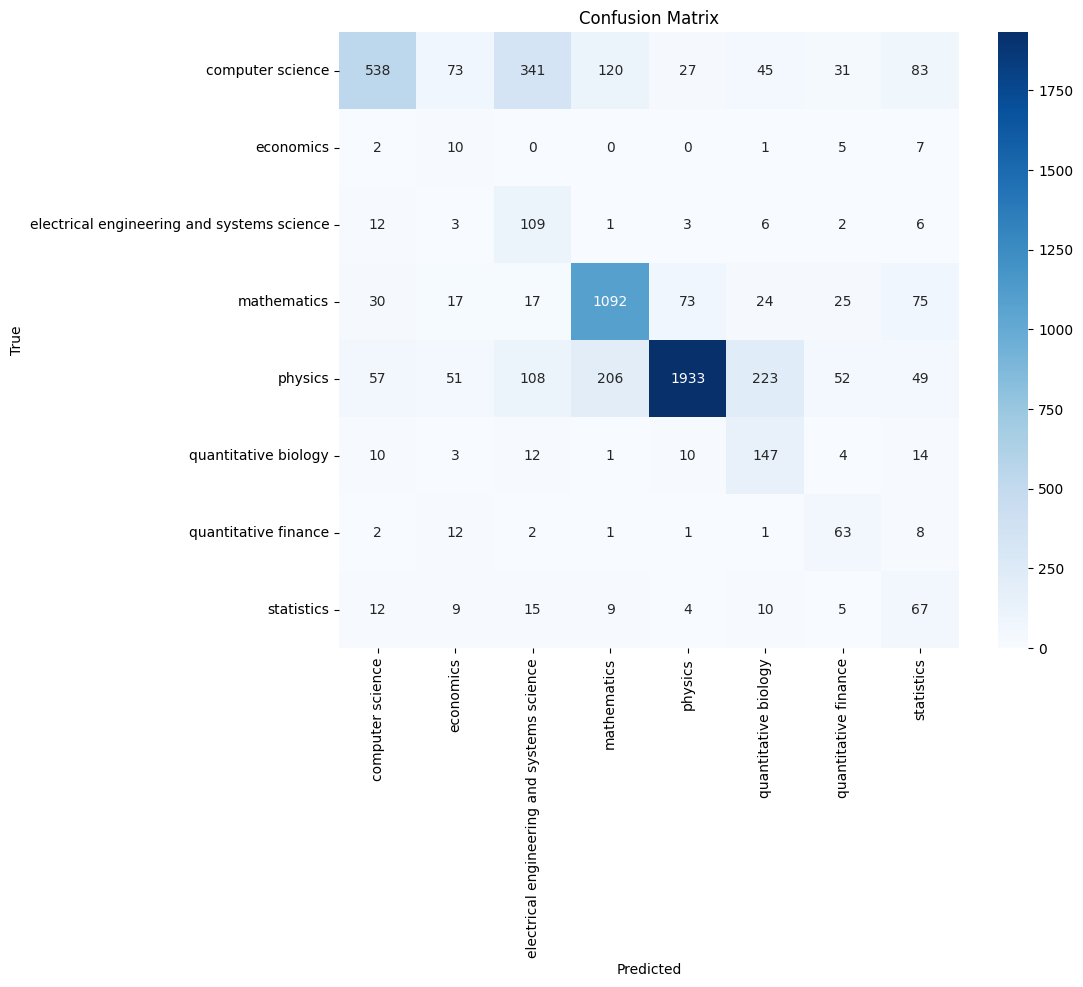

array(['physics', 'physics', 'electrical engineering and systems science',
       ..., 'mathematics', 'physics', 'physics'], dtype='<U42')

In [6]:
m4_model.predict(X_test, y_test)

## 08.6 - Save the Model

In [7]:
save_model(m4_model, '../models/m4_convolutional_neural_network.bin')


Model saved successfully to ../models/m4_convolutional_neural_network.bin
